In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import shap
shap.initjs()

In [2]:
pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_csv("abalone.csv")

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [6]:
names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']
print(len(df))

4177


Text(0.5, 0, 'Whole weight')

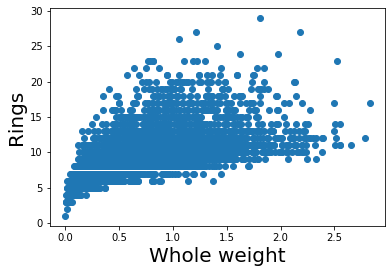

In [8]:
#plot1: whole weight

plt.scatter(df['Whole weight'], df['Rings'])
plt.ylabel('Rings', size=20)
plt.xlabel('Whole weight', size=20)

Text(0.5, 0, 'sex')

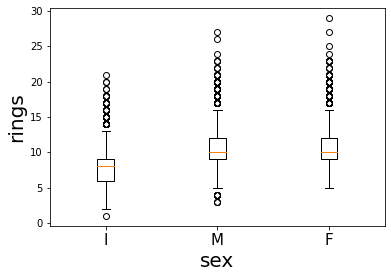

In [11]:
#plot 2: sex

plt.boxplot(df[df.Sex=='I']['Rings'],positions=[1])
plt.boxplot(df[df.Sex=='M']['Rings'],positions=[2])
plt.boxplot(df[df.Sex=='F']['Rings'],positions=[3])


plt.xticks(ticks=[1,2,3],labels=['I','M','F'], size=15)
plt.ylabel('rings', size=20)
plt.xlabel('sex', size=20)

In [12]:
cont = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']
corr_matrix = pd.DataFrame(df[cont],columns=cont).corr()

<AxesSubplot:>

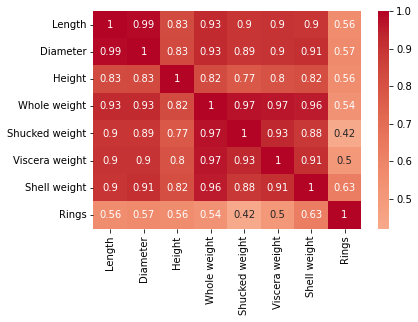

In [15]:
sns.heatmap(corr_matrix, cmap='coolwarm', center =0, annot=True)

In [17]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [16]:
y = df['Rings']
x = df[['Sex', 'Length','Height','Shucked weight','Viscera weight', 'Shell weight']]

In [19]:
#Create dummy variable
x['Sex.M'] = [1 if s== 'M' else 0 for s in x['Sex']]
x['Sex.F'] = [1 if s== 'F' else 0 for s in x['Sex']]
x['Sex.I'] = [1 if s== 'I' else 0 for s in x['Sex']]

x = x.drop('Sex', axis=1)
x.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Length,Height,Shucked weight,Viscera weight,Shell weight,Sex.M,Sex.F,Sex.I
0,0.455,0.095,0.2245,0.1010,0.150,1,0,0
1,0.350,0.090,0.0995,0.0485,0.070,1,0,0
2,0.530,0.135,0.2565,0.1415,0.210,0,1,0
3,0.440,0.125,0.2155,0.1140,0.155,1,0,0
4,0.330,0.080,0.0895,0.0395,0.055,0,0,1


In [20]:
#Modeling

model = xgb.XGBRegressor(objective="reg:squarederror")

In [21]:
model.fit(x,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [22]:
#Get predictions
y_pred = model.predict(x)

Text(0.5, 0, 'Actual')

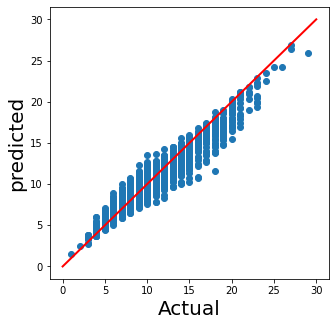

In [23]:
plt.figure(figsize=(5,5))
plt.scatter(y,y_pred)
plt.plot([0,30],
        [0,30],
        color='r',
        linestyle='-',
        linewidth=2)
plt.ylabel('predicted', size=20)
plt.xlabel('Actual',size=20)

In [24]:
#Standard Shap values
explainer = shap.Explainer(model)
shap_values = explainer(x)


In [25]:
np.shape(shap_values.values)

(4177, 8)

# Waterfall plot

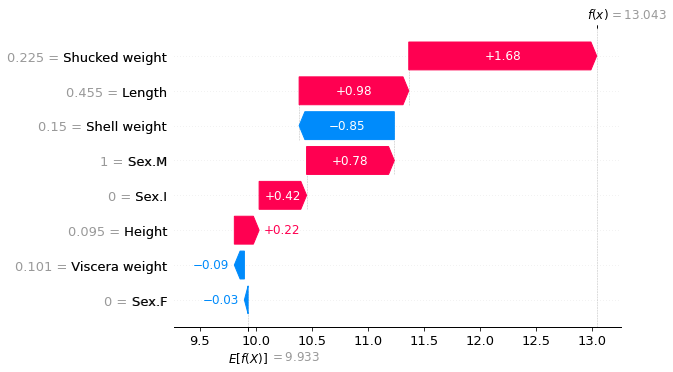

In [26]:
shap.plots.waterfall(shap_values[0])

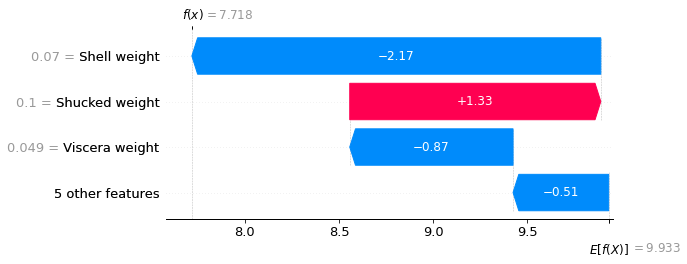

In [28]:
shap.plots.waterfall(shap_values[1], max_display=4) #Waterfall plot for first observation

# Force Plot

In [30]:
shap.plots.force(shap_values[0])

# Stacked Force Plot

In [29]:
shap.plots.force(shap_values[0:100])

# Absolute Mean Shap

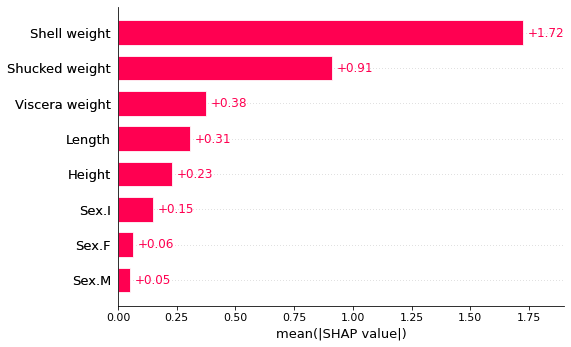

In [31]:
shap.plots.bar(shap_values)

# Beeswarm Plot

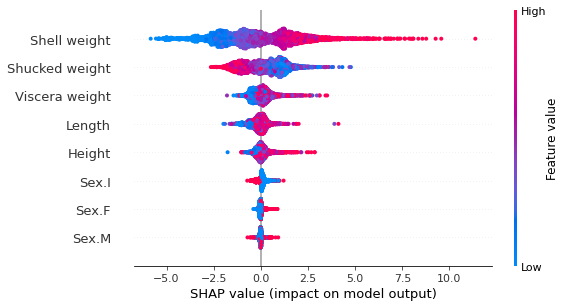

In [34]:
shap.plots.beeswarm(shap_values)

# Dependeces Plot

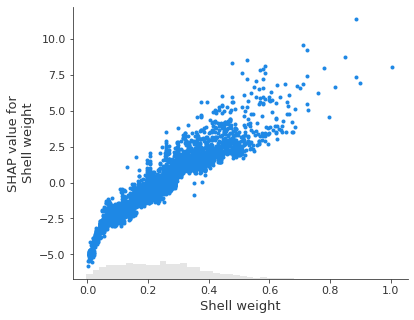

In [37]:
shap.plots.scatter(shap_values[:,'Shell weight'])

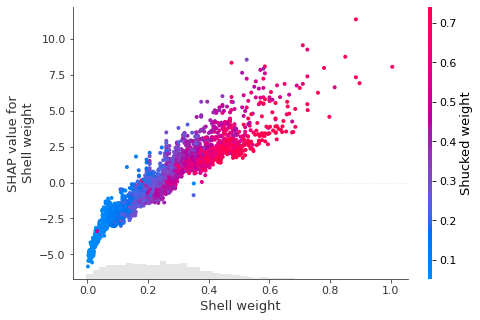

In [39]:
shap.plots.scatter(shap_values[:,'Shell weight'], color=shap_values[:,"Shucked weight"])

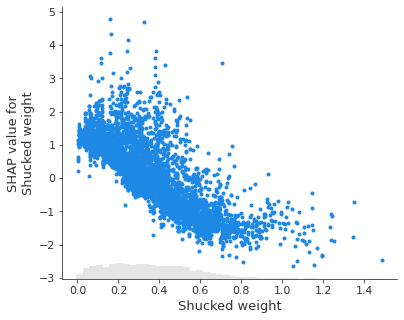

In [40]:
shap.plots.scatter(shap_values[:,'Shell weight'])

# Custom Plots